In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

In [55]:
bike = pd.read_csv("C:\\Users\\Umang\\Downloads\\Bike-Sharing data_daywise.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bike.shape

(731, 16)

In [5]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
def temp(t):
    return ((t*47)-8)
temp(bike['temp'])


0       8.175849
1       9.083466
2       1.229108
3       1.400000
4       2.666979
5       1.604356
6       1.236534
7      -0.245000
8      -1.498349
9      -0.910849
10     -0.052723
11      0.118169
12     -0.245000
13     -0.439110
14      2.966651
15      2.888349
16      0.264151
17      2.183349
18      5.732178
19      4.298349
20      0.342500
21     -5.220871
22     -3.463480
23     -3.422609
24      2.503466
25      2.222500
26      1.165000
27      1.563466
28      1.236534
29      2.176534
         ...    
701     8.332500
702    13.267500
703    14.364151
704    12.601651
705     4.024151
706     7.079151
707     9.938349
708    10.055849
709    12.484151
710     8.606651
711     5.982500
712     5.904151
713     5.238349
714     7.235849
715     9.037500
716    10.486651
717    11.309151
718     7.627500
719     7.510000
720     7.353349
721     4.494151
722     3.554151
723     2.871288
724     5.691288
725     3.436651
726     3.945849
727     3.906651
728     3.9066

In [10]:
def atemp(t):
    return ((t*66)-16)
atemp(bike['atemp'])

0       7.999250
1       7.346774
2      -3.499270
3      -1.999948
4      -0.868180
5      -0.608206
6      -2.216626
7      -5.291236
8      -8.332450
9      -6.041392
10     -3.363376
11     -5.408782
12     -6.041722
13     -3.564742
14      0.375392
15     -0.541678
16     -4.333114
17     -0.666022
18      3.695852
19      0.833300
20     -5.583022
21    -10.781406
22     -9.476619
23     -8.216620
24     -0.521284
25     -2.562400
26     -1.499800
27     -1.261078
28     -1.999684
29      0.521252
         ...    
701     7.707728
702    14.082536
703    14.957564
704    12.248792
705     1.041464
706     5.249228
707     9.707528
708     9.749636
709    12.747950
710     6.331958
711     3.624308
712     3.416408
713     3.416672
714     6.333278
715     8.415908
716    10.499000
717    11.040728
718     6.582692
719     6.124322
720     3.916622
721    -0.416542
722     1.125086
723     1.087400
724     3.434690
725    -1.458022
726    -1.041628
727     0.833036
728    -0.0016

In [14]:
#Q2
bike[['mnth','workingday']].groupby('mnth').count()
    

,workingday
mnth,
1,62
2,57
3,62
4,60
5,62
6,60
7,62
8,62
9,60


In [33]:
ax = pd.crosstab(index=bike['mnth'],columns=bike['workingday'])
for i in range(1,13):
    if (ax[0][i]==max(ax[0])):
        print(i, 'st working month has the highest non-working day')

1 st working month has the highest non-working day


In [35]:
#Q3
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

In [36]:
model = smf.ols(formula='cnt ~ weathersit', data=bike)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     70.73
Date:                Sat, 14 Apr 2018   Prob (F-statistic):           2.15e-16
Time:                        12:25:30   Log-Likelihood:                -6535.8
No. Observations:                 731   AIC:                         1.308e+04
Df Residuals:                     729   BIC:                         1.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5979.6330    188.303     31.755      0.0

In [37]:
#high value of F-statistic and low p-value indicates we should reject null hypothesis and conclude that there is a relationship between cnt and weathersit
import seaborn as sns

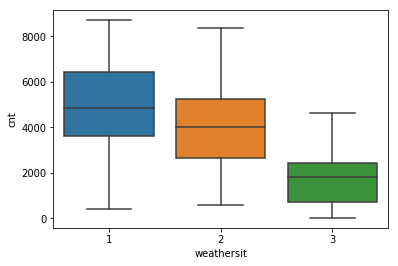

In [38]:
sns.boxplot(bike['weathersit'], bike['cnt'])
plt.show()
#from boxplot it is clear weather situation has an effect on total rental bikes, for clear weather no of bikes increases

In [39]:
bike['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

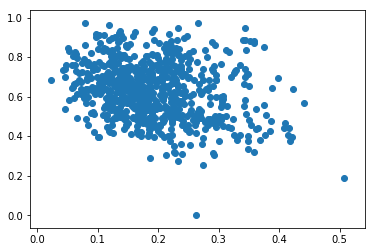

In [40]:
#Q4
plt.scatter(bike['windspeed'],bike['hum'])
plt.show()

In [41]:
bike.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [ ]:
#scatter plot and correlation value of -0.248 indicates there is some relationship between windspeed and humidity but not that strong

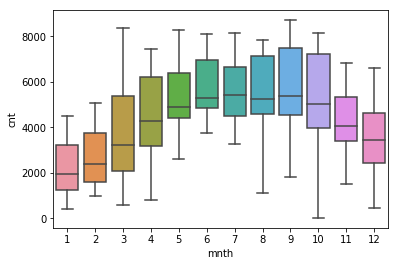

In [42]:
#Q5
sns.boxplot(bike['mnth'],bike['cnt'])


In [47]:
#Q6
bike[['mnth','cnt']].groupby('mnth').mean()
# 1st month has the least average footfall 

,cnt
mnth,
1,2176.338710
2,2655.298246
3,3692.258065
4,4484.900000
5,5349.774194
6,5772.366667
7,5563.677419
8,5664.419355
9,5766.516667


In [53]:
#Q7
print(bike[bike['dteday']=='2011-02-29'])
print(bike[bike['dteday']=='2012-02-29'])

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
424      425  2012-02-29       1   1     2        0        3           1   

     weathersit      temp    atemp       hum  windspeed  casual  registered  \
424           2  0.344348  0.34847  0.804783   0.179117      65        1769   

      cnt  
424  1834  


In [56]:
#Q8
bike[['season','cnt']].groupby('season').mean()
#season 3 has the highest average number of total rental and season 1 has lowest
#so fall is the peak season and springer is the leanest one

,cnt
season,
1,2604.132597
2,4992.331522
3,5644.303191
4,4728.162921


In [ ]:
#Q9


In [59]:
#Q10
insurance = pd.read_csv("C:\\Users\\Umang\\Downloads\\insurance.csv")
insurance.head()

,Unnamed: 0,claimid,incident_date,claim_type,uninhabitable,claim_amount,fraudulent,policyid,policy_date,coverage,...,gender,dob,edcat,job_start_date,retire,income,marital,reside,occupancy_date,primary_residence
0,1,351069569,18/01/2008,3,0,192.287,0,SSB-514465,26/01/1987,436,...,1,12/03/1943,2,16/04/1981,0,193,0,1,06/01/1978,1
1,2,806984053,18/07/2008,3,0,355.896,0,XWZ-702801,14/05/1983,925,...,0,10/05/1933,2,04/11/1982,0,203,0,1,04/02/1971,1
2,3,654100160,01/03/2008,5,0,3.530,0,FMP-391297,15/01/1988,79,...,1,02/04/1939,2,20/08/2004,0,49,0,1,30/03/1977,1
3,4,653220231,28/10/2008,1,0,33.452,0,WEV-471919,22/02/2000,607,...,0,12/04/1972,3,29/07/1999,0,118,1,3,23/05/1993,1
4,5,226637568,31/05/2008,5,0,4.029,0,ESY-256692,09/08/2001,119,...,1,04/08/1968,1,04/07/2004,0,18,0,1,04/09/2000,1


In [65]:
cx = pd.crosstab(index=insurance['gender'],columns=insurance['edcat'],margins=True)
cx.columns = ['primary','sec','grad','pg','doc','rowTotal']
cx.index=['female','male','coltotal']
cx

,primary,sec,grad,pg,doc,rowTotal
female,362,672,488,506,147,2175
male,398,750,450,484,158,2240
coltotal,760,1422,938,990,305,4415


In [67]:
cx*100/cx.loc["coltotal"]
#percentage of graduate and post graduate are higher in females than males, for doctorate male percentage is higher

,primary,sec,grad,pg,doc,rowTotal
female,47.631579,47.257384,52.025586,51.111111,48.196721,49.263873
male,52.368421,52.742616,47.974414,48.888889,51.803279,50.736127
coltotal,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [68]:
#Q12
insurance_cluster = insurance[['claim_amount','coverage','income']]
insurance_cluster.head()

,claim_amount,coverage,income
0,192.287,436,193
1,355.896,925,203
2,3.530,79,49
3,33.452,607,118
4,4.029,119,18


In [71]:
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [72]:
insurance_cluster_nor = pd.DataFrame(preprocessing.scale(insurance_cluster))
insurance_cluster_nor.head()

,0,1,2
0,0.826097,0.401472,1.876484
1,1.959241,1.900544,2.024575
2,-0.481220,-0.692942,-0.256036
3,-0.273982,0.925687,0.765796
4,-0.477764,-0.570318,-0.715120


In [73]:
TSS = []
for k in range(1,10):
    Km = KMeans(n_clusters=k,n_init=50)
    ss = Km.fit(insurance_cluster_nor).inertia_
    TSS.append(ss)
print(min(TSS))

2653.30174217


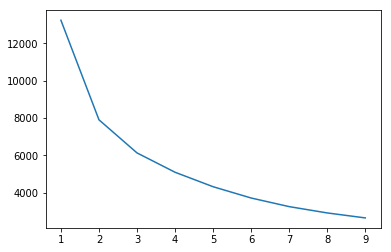

In [74]:
plt.plot(range(1,10),TSS)
plt.show()

In [79]:
KM = KMeans(n_clusters=4,n_init=50)

In [80]:
fit = KM.fit(insurance_cluster_nor)

In [81]:
fit.cluster_centers_

array([[-0.23555875, -0.38517822, -0.28475538],
       [ 0.10939013,  1.29775303,  0.92065863],
       [ 1.41944591,  3.02903304,  5.51213337],
       [ 3.74441426,  1.92294096,  0.63008624]])

In [82]:
silhouette_score(X=insurance_cluster_nor,labels=fit.labels_)

0.56817438558196465

In [ ]:
#Q13
